# RSI Trading Strategy

* Download the data for the stock you want, by the ticker
* Set the date and the time for the time period you want to trade on
* Execute the "trades"

In [232]:
import pandas as pd
import yfinance as yf
import numpy as np
import ta
import matplotlib.pyplot as plt

end_date = '2025-06-27'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365)

stock = "LHA.DE"

df = yf.download(tickers=stock, start=start_date, end=end_date, auto_adjust=True).stack(future_stack=True)

df.index.names = ['date','ticker']
df.columns = df.columns.str.lower()

df

[*********************100%***********************]  1 of 1 completed


,Price,close,high,low,open,volume
date,ticker,,,,,
2015-06-30,LHA.DE,7.524646,7.632001,7.524646,7.560431,5222705
2015-07-01,LHA.DE,7.596217,7.710079,7.557179,7.586458,5357438
2015-07-02,LHA.DE,7.605977,7.654775,7.566939,7.576698,3401977
2015-07-03,LHA.DE,7.550672,7.638508,7.501874,7.618990,3477838
2015-07-06,LHA.DE,7.482355,7.537660,7.417291,7.456329,3711241
...,...,...,...,...,...,...
2025-06-20,LHA.DE,6.848000,6.864000,6.760000,6.768000,12815257
2025-06-23,LHA.DE,6.784000,6.832000,6.684000,6.686000,4692826
2025-06-24,LHA.DE,7.224000,7.250000,7.092000,7.100000,12879237


# Calculate the RSI


In [234]:
def rsi_calc(x, window=14):
    return ta.momentum.RSIIndicator(close=x, window=window).rsi()

df['rsi'] = df.groupby(level='ticker')['close'].transform(lambda x: rsi_calc(x, window=14))

df


,Price,close,high,low,open,volume,rsi
date,ticker,,,,,,
2015-06-30,LHA.DE,7.524646,7.632001,7.524646,7.560431,5222705,NaN
2015-07-01,LHA.DE,7.596217,7.710079,7.557179,7.586458,5357438,NaN
2015-07-02,LHA.DE,7.605977,7.654775,7.566939,7.576698,3401977,NaN
2015-07-03,LHA.DE,7.550672,7.638508,7.501874,7.618990,3477838,NaN
2015-07-06,LHA.DE,7.482355,7.537660,7.417291,7.456329,3711241,NaN
...,...,...,...,...,...,...,...
2025-06-20,LHA.DE,6.848000,6.864000,6.760000,6.768000,12815257,49.416396
2025-06-23,LHA.DE,6.784000,6.832000,6.684000,6.686000,4692826,47.381305
2025-06-24,LHA.DE,7.224000,7.250000,7.092000,7.100000,12879237,59.676333


# Plot the graph

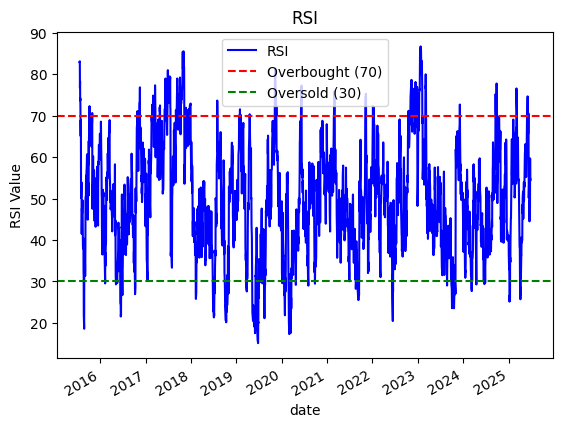

In [235]:
df_stock = df.xs(stock, level=1)

df_stock['rsi'].plot(label='RSI', color='blue')

plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

plt.title('RSI')
plt.ylabel('RSI Value')
plt.legend()
plt.show()


In [236]:
shares_to_buy = 100
position = 0
buy_price = 0
total_profit = 0
trades = []

for (date, ticker), row in df.iterrows():
    rsi = row['rsi']
    close = row['close']

    if pd.isna(rsi):
        continue

    if position == 0 and rsi <= 40:
        buy_price = close
        position = 1
        trades.append((date, 'BUY', close))
        print(f"Buy on {date.date()} at {close:.2f}")

    elif position == 1 and rsi >= 70:
        sell_price = close 
        profit = (sell_price - buy_price) * shares_to_buy
        total_profit += profit
        position = 0
        trades.append((date, 'SELL', close, profit))
        print(f"Sell on {date.date()} at {close:.2f} Profit: ${profit:.2f}")

print(f"\nTotal Profit: ${total_profit:.2f}")


Buy on 2015-08-14 at 7.71
Sell on 2015-10-05 at 8.68 Profit: $96.62
Buy on 2016-01-15 at 8.86
Sell on 2016-10-26 at 7.60 Profit: $-125.90
Buy on 2017-01-09 at 7.60
Sell on 2017-02-21 at 8.89 Profit: $129.15
Buy on 2017-07-21 at 12.07
Sell on 2017-09-01 at 14.16 Profit: $208.53
Buy on 2018-01-25 at 18.60
Sell on 2018-07-31 at 15.62 Profit: $-298.64
Buy on 2018-09-07 at 14.44
Sell on 2019-01-25 at 14.40 Profit: $-3.90
Buy on 2019-03-15 at 13.75
Sell on 2019-04-18 at 14.70 Profit: $94.99
Buy on 2019-05-07 at 13.25
Sell on 2019-11-07 at 11.23 Profit: $-202.35
Buy on 2020-01-03 at 10.14
Sell on 2020-06-05 at 7.07 Profit: $-307.10
Buy on 2020-07-14 at 5.52
Sell on 2021-02-26 at 7.99 Profit: $246.92
Buy on 2021-03-23 at 6.98
Sell on 2021-11-05 at 6.31 Profit: $-66.71
Buy on 2021-11-26 at 4.94
Sell on 2022-01-04 at 6.43 Profit: $148.97
Buy on 2022-03-01 at 5.79
Sell on 2022-10-19 at 6.16 Profit: $37.47
Buy on 2023-05-04 at 8.39
Sell on 2023-12-06 at 7.83 Profit: $-56.16
Buy on 2024-01-03 at 6.